In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [2]:
import datetime
import yfinance as yf

aapl = yf.download('AAPL',
                   start=datetime.datetime(2006, 10, 1),
                   end=datetime.datetime(2012, 1, 1))
print(aapl.head())


Failed to get ticker 'AAPL' reason: HTTPSConnectionPool(host='fc.yahoo.com', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7c6cd60d9bb0>: Failed to resolve 'fc.yahoo.com' ([Errno -3] Temporary failure in name resolution)"))
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['AAPL']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []


In [3]:
# !pip install quandl
import quandl

# Set your Quandl API key if necessary
# quandl.ApiConfig.api_key = 'your_api_key_here'

aapl = quandl.get("WIKI/AAPL", start_date="2006-10-01", end_date="2012-01-01")
print(aapl.head())


             Open    High    Low  Close      Volume  Ex-Dividend  Split Ratio  \
Date                                                                            
2006-10-02  75.10  75.870  74.30  74.86  25451400.0          0.0          1.0   
2006-10-03  74.45  74.950  73.19  74.07  28239600.0          0.0          1.0   
2006-10-04  74.10  75.462  73.16  75.38  29610100.0          0.0          1.0   
2006-10-05  74.53  76.160  74.13  74.83  24424400.0          0.0          1.0   
2006-10-06  74.42  75.040  73.81  74.22  16677100.0          0.0          1.0   

            Adj. Open  Adj. High  Adj. Low  Adj. Close  Adj. Volume  
Date                                                                 
2006-10-02   9.651397   9.750352  9.548586    9.620553  178159800.0  
2006-10-03   9.567863   9.632120  9.405935    9.519027  197677200.0  
2006-10-04   9.522883   9.697919  9.402080    9.687381  207270700.0  
2006-10-05   9.578144   9.787621  9.526738    9.616698  170970800.0  
2006-10-06  

In [4]:
aapl.index

aapl.columns

ts = aapl['Close'][-10:]

type(ts)

pandas.core.series.Series

In [5]:
aapl['diff'] = aapl.Open - aapl.Close

del aapl['diff']

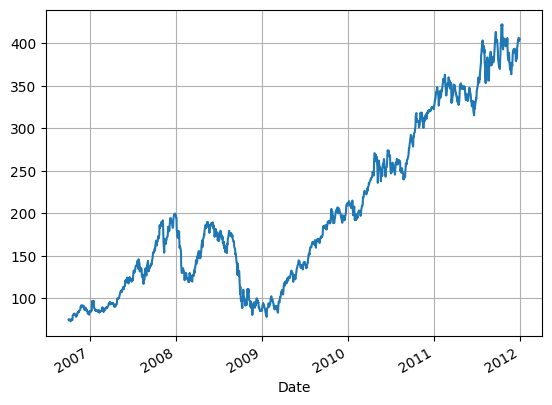

In [6]:
import matplotlib.pyplot as plt

aapl['Close'].plot(grid=True)

plt.show()

In [7]:
print(aapl.columns)


Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Ex-Dividend', 'Split Ratio',
       'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume'],
      dtype='object')


In [8]:
daily_close = aapl[['Adj. Close']]

daily_pct_c = daily_close.pct_change()

daily_pct_c.fillna(0, inplace=True)

print(daily_pct_c)

daily_log_returns = np.log(daily_close.pct_change()+1)

print(daily_log_returns)

            Adj. Close
Date                  
2006-10-02    0.000000
2006-10-03   -0.010553
2006-10-04    0.017686
2006-10-05   -0.007296
2006-10-06   -0.008152
...                ...
2011-12-23    0.011993
2011-12-27    0.007934
2011-12-28   -0.009569
2011-12-29    0.006159
2011-12-30   -0.000296

[1323 rows x 1 columns]
            Adj. Close
Date                  
2006-10-02         NaN
2006-10-03   -0.010609
2006-10-04    0.017531
2006-10-05   -0.007323
2006-10-06   -0.008185
...                ...
2011-12-23    0.011922
2011-12-27    0.007903
2011-12-28   -0.009615
2011-12-29    0.006140
2011-12-30   -0.000296

[1323 rows x 1 columns]


In [9]:
monthly = aapl.resample('BM').apply(lambda x: x[-1])

monthly.pct_change()

quarter = aapl.resample("4M").mean()

quarter.pct_change()

/tmp/ipykernel_33719/4261184245.py:1: FutureWarning: 'BM' is deprecated and will be removed in a future version, please use 'BME' instead.
  monthly = aapl.resample('BM').apply(lambda x: x[-1])
/tmp/ipykernel_33719/4261184245.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  monthly = aapl.resample('BM').apply(lambda x: x[-1])
/tmp/ipykernel_33719/4261184245.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  quarter = aapl.resample("4M").mean()


,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2006-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-02-28,0.125782,0.124336,0.121461,0.122890,0.369611,NaN,0.0,0.125782,0.124336,0.121461,0.122890,0.369611
2007-06-30,0.196028,0.195413,0.198331,0.197710,-0.080296,NaN,0.0,0.196028,0.195413,0.198331,0.197710,-0.080296
2007-10-31,0.400986,0.404614,0.392010,0.400796,0.306882,NaN,0.0,0.400986,0.404614,0.392010,0.400796,0.306882
2008-02-29,0.127085,0.131274,0.117746,0.120394,0.172293,NaN,0.0,0.127085,0.131274,0.117746,0.120394,0.172293
2008-06-30,-0.003844,-0.004781,0.005927,0.003673,-0.209762,NaN,0.0,-0.003844,-0.004781,0.005927,0.003673,-0.209762
2008-10-31,-0.114295,-0.108566,-0.124619,-0.118803,0.133219,NaN,0.0,-0.114295,-0.108566,-0.124619,-0.118803,0.133219
2009-02-28,-0.363319,-0.363614,-0.359304,-0.360865,-0.161601,NaN,0.0,-0.363319,-0.363614,-0.359304,-0.360865,-0.161601
2009-06-30,0.311992,0.304360,0.324701,0.316630,-0.386935,NaN,0.0,0.311992,0.304360,0.324701,0.316630,-0.386935


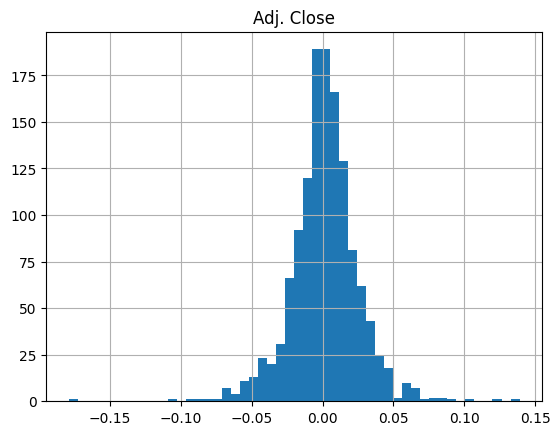

        Adj. Close
count  1323.000000
mean      0.001565
std       0.023985
min      -0.179195
25%      -0.010622
50%       0.001646
75%       0.014285
max       0.139050


In [10]:
import matplotlib.pyplot as plt

daily_pct_c.hist(bins=50)

plt.show()

print(daily_pct_c.describe())

In [11]:
cum_daily_return = (1 + daily_pct_c).cumprod()

print(cum_daily_return)

            Adj. Close
Date                  
2006-10-02    1.000000
2006-10-03    0.989447
2006-10-04    1.006946
2006-10-05    0.999599
2006-10-06    0.991451
...                ...
2011-12-23    5.387791
2011-12-27    5.430537
2011-12-28    5.378573
2011-12-29    5.411702
2011-12-30    5.410099

[1323 rows x 1 columns]


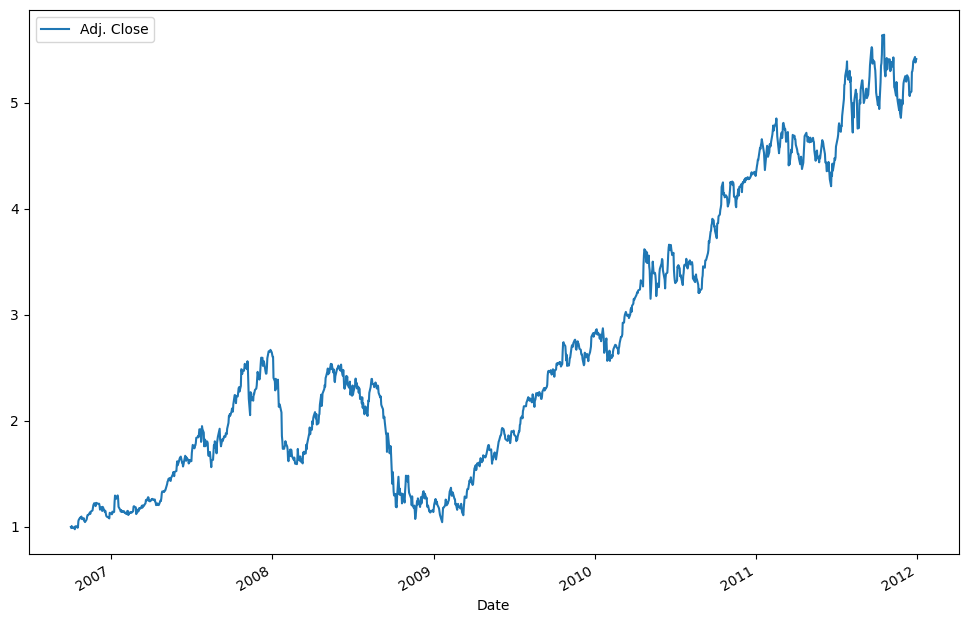

In [12]:
import matplotlib.pyplot as plt

cum_daily_return.plot(figsize=(12,8))

plt.show()

In [13]:
cum_monthly_return = cum_daily_return.resample("M").mean()

print(cum_monthly_return)

            Adj. Close
Date                  
2006-10-31    1.030263
2006-11-30    1.140058
2006-12-31    1.155110
2007-01-31    1.187303
2007-02-28    1.145275
...                ...
2011-08-31    5.032896
2011-09-30    5.243031
2011-10-31    5.306305
2011-11-30    5.140465
2011-12-31    5.248868

[63 rows x 1 columns]


/tmp/ipykernel_33719/194966105.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  cum_monthly_return = cum_daily_return.resample("M").mean()


In [14]:
# !pip install --upgrade pandas-datareader
def data(ticker):
    try:
        return pdr.get_data_yahoo(ticker, start=startdate, end=enddate)
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")
        return None


In [15]:
from pandas_datareader import data as pdr
import yfinance

def get(tickers, startdate, enddate):
    def data(ticker):
        return (yf.download(ticker, start=startdate, end=enddate))
    datas = map (data, tickers)
    return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

tickers = ['AAPL', 'MSFT', 'IBM', 'GOOG']
all_data = get(tickers, datetime.datetime(2006, 10, 1), datetime.datetime(2012, 1, 1))
all_data.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Open      High       Low     Close  Adj Close  \
Ticker Date                                                            
AAPL   2006-10-02  2.682143  2.709643  2.653571  2.673571   2.257765   
       2006-10-03  2.658929  2.676786  2.613929  2.645714   2.234240   
       2006-10-04  2.646429  2.695000  2.612857  2.692143   2.273448   
       2006-10-05  2.661786  2.720000  2.647500  2.672500   2.256860   
       2006-10-06  2.657857  2.680000  2.636071  2.650714   2.238462   

                      Volume  
Ticker Date                   
AAPL   2006-10-02  712639200  
       2006-10-03  790708800  
       2006-10-04  829082800  
       2006-10-05  683883200  
       2006-10-06  466958800

In [16]:
import quandl
aapl = quandl.get("WIKI/AAPL", start_date="2006-10-01", end_date="2012-01-01")
aapl.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2006-10-02,75.10,75.870,74.30,74.86,25451400.0,0.0,1.0,9.651397,9.750352,9.548586,9.620553,178159800.0
2006-10-03,74.45,74.950,73.19,74.07,28239600.0,0.0,1.0,9.567863,9.632120,9.405935,9.519027,197677200.0
2006-10-04,74.10,75.462,73.16,75.38,29610100.0,0.0,1.0,9.522883,9.697919,9.402080,9.687381,207270700.0
2006-10-05,74.53,76.160,74.13,74.83,24424400.0,0.0,1.0,9.578144,9.787621,9.526738,9.616698,170970800.0
2006-10-06,74.42,75.040,73.81,74.22,16677100.0,0.0,1.0,9.564007,9.643686,9.485614,9.538304,116739700.0


In [19]:
def get(tickers, startdate, enddate):
    def data(ticker):
        return yf.download(ticker, start=startdate, end=enddate)
    datas = map(data, tickers)
    return pd.concat(datas, keys=tickers, names=['Ticker', 'Date'])

tickers = ['AAPL', 'MSFT', 'IBM', 'GOOG']
all_data = get(tickers, datetime.datetime(2006, 10, 1), datetime.datetime(2012, 1, 1))
print(all_data.head())

[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

                       Open      High       Low     Close  Adj Close  \
Ticker Date                                                            
AAPL   2006-10-02  2.682143  2.709643  2.653571  2.673571   2.257765   
       2006-10-03  2.658929  2.676786  2.613929  2.645714   2.234240   
       2006-10-04  2.646429  2.695000  2.612857  2.692143   2.273448   
       2006-10-05  2.661786  2.720000  2.647500  2.672500   2.256860   
       2006-10-06  2.657857  2.680000  2.636071  2.650714   2.238462   

                      Volume  
Ticker Date                   
AAPL   2006-10-02  712639200  
       2006-10-03  790708800  
       2006-10-04  829082800  
       2006-10-05  683883200  
       2006-10-06  466958800  


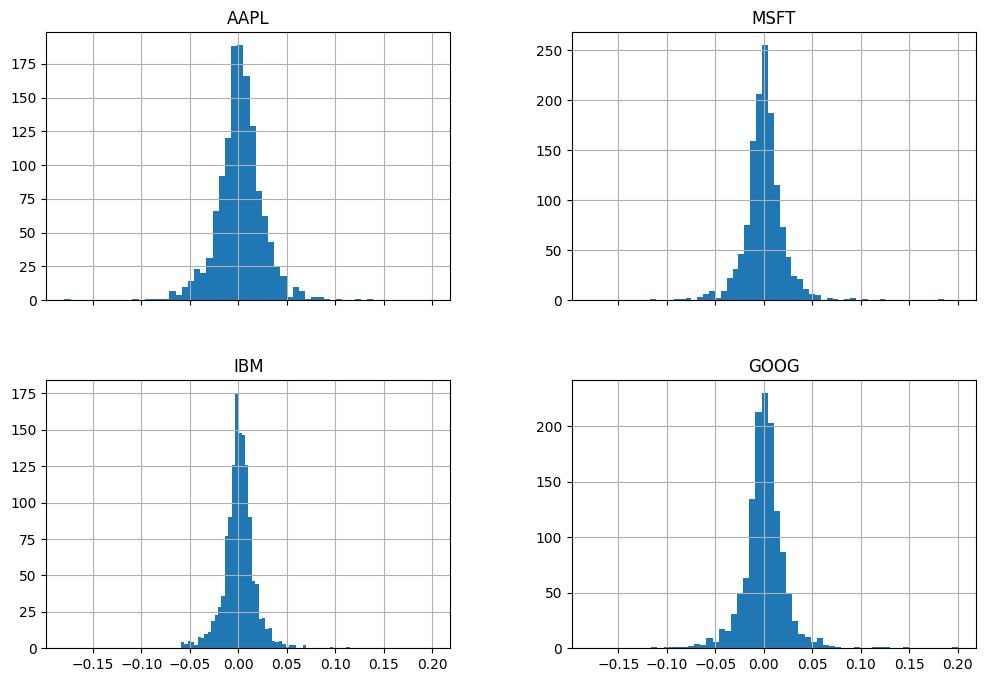

In [20]:

daily_close_px = all_data['Adj Close'].unstack(level=0)
daily_pct_change = daily_close_px.pct_change()

daily_pct_change.hist(bins=50, sharex=True, figsize=(12,8))
plt.show()

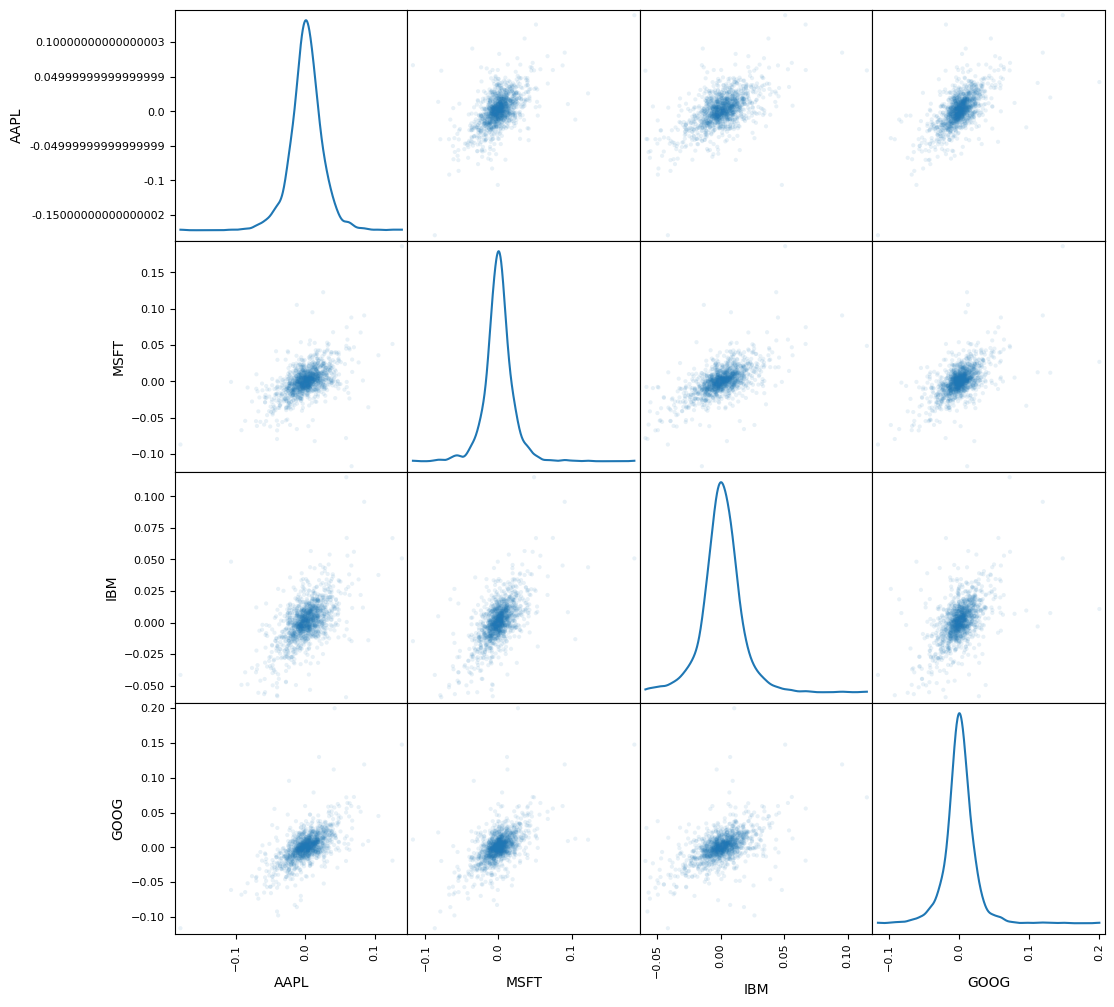

In [21]:
pd.plotting.scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1,figsize=(12,12))

plt.show()

In [22]:
adj_close_px = aapl['Adj. Close']

moving_avg = adj_close_px.rolling(window=40).mean()

moving_avg[-10:]

Date
2011-12-16    49.954364
2011-12-19    49.920115
2011-12-20    49.888564
2011-12-21    49.884307
2011-12-22    49.877721
2011-12-23    49.873352
2011-12-27    49.878428
2011-12-28    49.871552
2011-12-29    49.899215
2011-12-30    49.923601
Name: Adj. Close, dtype: float64

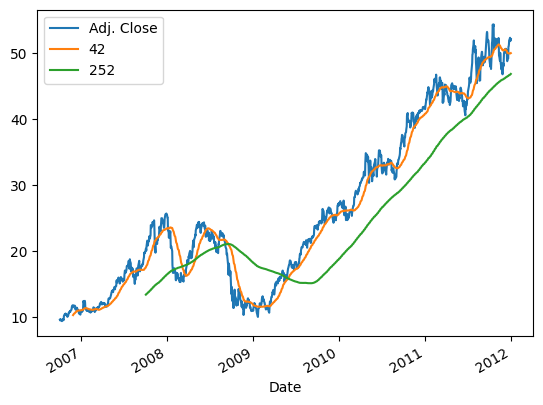

In [23]:
aapl['42'] = adj_close_px.rolling(window=40).mean()

aapl['252'] = adj_close_px.rolling(window=252).mean()

aapl[['Adj. Close', '42', '252']].plot()

plt.show()

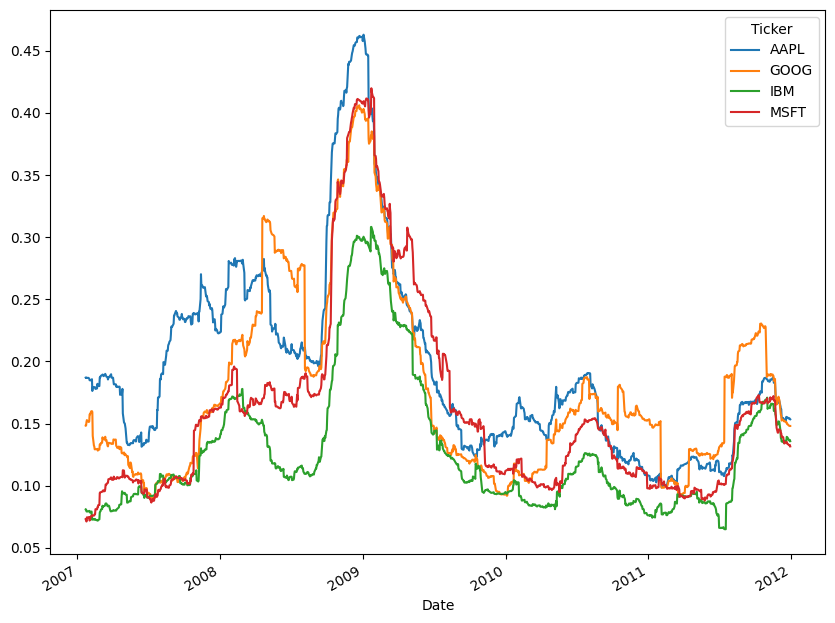

In [34]:
min_periods = 75

vol = daily_pct_change.rolling(min_periods).std() * np.sqrt(min_periods)

vol.plot(figsize=(10, 8))

plt.show()

In [35]:
import statsmodels.api as sm
import pandas
from pandas import tseries

all_adj_close = all_data[['Adj Close']]

all_returns = np.log(all_adj_close / all_adj_close.shift(1))

aapl_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'AAPL']
aapl_returns.index = aapl_returns.index.droplevel('Ticker')

msft_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'MSFT']
msft_returns.index = msft_returns.index.droplevel('Ticker')

return_data = pd.concat([aapl_returns, msft_returns], axis=1)[1:]
return_data.columns = ['AAPL', 'MSFT']

X = sm.add_constant(return_data['AAPL'])

model = sm.OLS(return_data['MSFT'],X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MSFT   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     515.5
Date:                Wed, 07 Feb 2024   Prob (F-statistic):           1.33e-96
Time:                        12:40:30   Log-Likelihood:                 3514.0
No. Observations:                1322   AIC:                            -7024.
Df Residuals:                    1320   BIC:                            -7014.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0005      0.000     -1.119      0.2

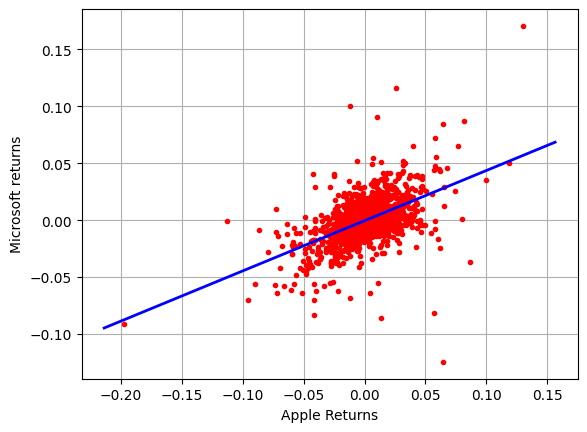

In [36]:
plt.plot(return_data['AAPL'], return_data['MSFT'], 'r.')

ax = plt.axis()
x = np.linspace(ax[0], ax[1] + 0.01)

plt.plot(x, model.params[0] + model.params[1] * x, 'b', lw=2)

plt.grid(True)
plt.axis('tight')
plt.xlabel('Apple Returns')
plt.ylabel('Microsoft returns')

plt.show()

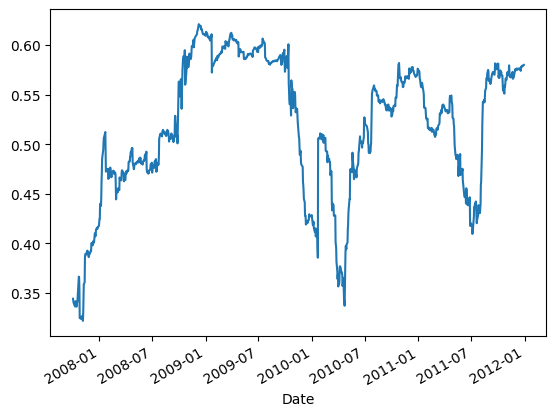

In [37]:
return_data['MSFT'].rolling(window=252).corr(return_data['AAPL']).plot()
plt.show()

In [38]:
short_window = 40
long_window = 100

signals = pd.DataFrame(index=aapl.index)
signals['signal'] = 0.0

signals['short_mavg'] = aapl['Close'].rolling(window=short_window, min_periods=1, center=False).mean()

signals['long_mavg'] = aapl['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:]
                                            > signals['long_mavg'][short_window:], 1.0, 0.0)

signals['positions'] = signals['signal'].diff()

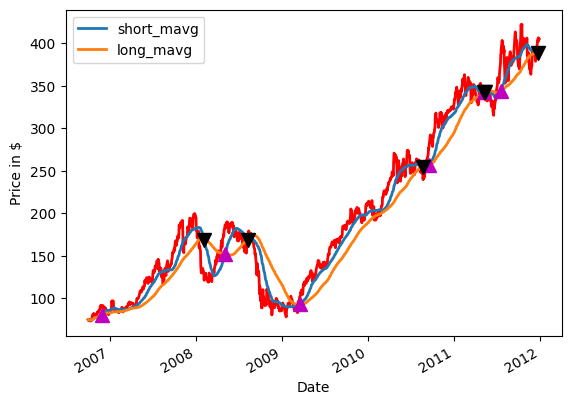

In [39]:
fig = plt.figure()

ax1 = fig.add_subplot(111,  ylabel='Price in $')

aapl['Close'].plot(ax=ax1, color='r', lw=2.)

signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

ax1.plot(signals.loc[signals.positions == 1.0].index,
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=10, color='m')

ax1.plot(signals.loc[signals.positions == -1.0].index,
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=10, color='k')

plt.show()

Backtesting a strategy

In [41]:
initial_capital= float(100000.0)

positions = pd.DataFrame(index=signals.index).fillna(0.0)

positions['AAPL'] = 100*signals['signal']

portfolio = positions.multiply(aapl['Adj. Close'], axis=0)

pos_diff = positions.diff()

portfolio['holdings'] = (positions.multiply(aapl['Adj. Close'], axis=0)).sum(axis=1)

portfolio['cash'] = initial_capital - (pos_diff.multiply(aapl['Adj. Close'], axis=0)).sum(axis=1).cumsum()

portfolio['total'] = portfolio['cash'] + portfolio['holdings']

portfolio['returns'] = portfolio['total'].pct_change()

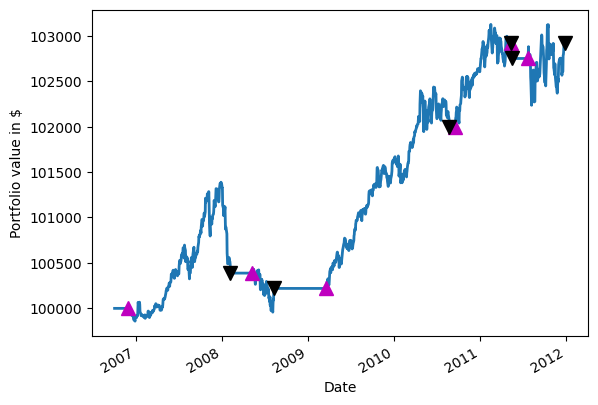

In [43]:
import matplotlib.pyplot as plt

fig = plt.figure()

ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

portfolio['total'].plot(ax=ax1, lw=2.)

ax1.plot(portfolio.loc[signals.positions == 1.0].index,
         portfolio.total[signals.positions == 1.0],
         '^', markersize=10, color='m')

ax1.plot(portfolio.loc[signals.positions == -1.0].index,
         portfolio.total[signals.positions == -1.0],
         'v', markersize=10, color='k')

plt.show()

In [44]:
returns = portfolio['returns']

sharpe_ratio = np.sqrt(252) * (returns.mean() / returns.std())

print(sharpe_ratio)

0.7261238825870245


**Maximum Drawdown**

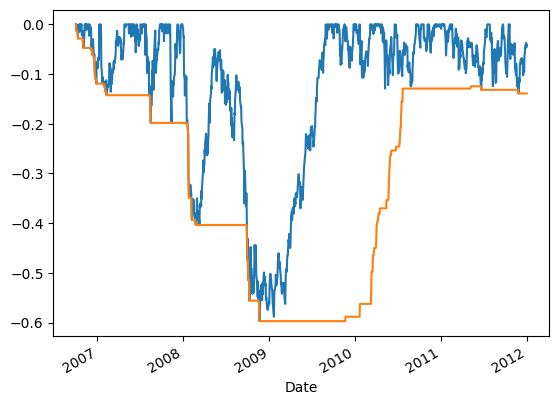

In [46]:
window = 252

rolling_max = aapl['Adj. Close'].rolling(window, min_periods=1).max()
daily_drawdown = aapl['Adj. Close']/rolling_max - 1.0

max_daily_drawdown = daily_drawdown.rolling(window, min_periods=1).min()

daily_drawdown.plot()
max_daily_drawdown.plot()

plt.show()